In [1]:
from mordred import Calculator, descriptors
from mordred import VdwVolumeABC
from rdkit import Chem
from rdkit.Chem import AllChem
import xlrd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from chempy import Substance
from chempy.properties.water_diffusivity_holz_2000 import water_self_diffusion_coefficient

## PFAS data formatting

In [3]:
# #read in sheet in individually
# sparc=pd.read_excel('PFAS_SMILES_Wetmore_volume_091721.xls', sheet_name='SPARC')

# #drop 'Molecule ' before id and convert id from str to int
# sparc['ID']=sparc['ID'].str.split('Molecule ',expand=True)[1].astype(int)

# #rename column 'Volume' to vdwVolume_SPARC
# sparc.rename(columns={'Volume':'vdwVolume_SPARC'},inplace=True)
# sparc

In [4]:
# #read in sheet in individually
# ca=pd.read_excel('PFAS_SMILES_Wetmore_volume_091721.xls', sheet_name='ChemAxon')

# #rename columns 'van der Waals volume'to vdwVolume_ChemAxon and 'id' to ID
# ca.rename(columns={'id': 'ID','van der Waals volume':'vdwVolume_ChemAxon'},inplace=True)
# ca

In [5]:
# #combine dataframes
# pfas=pd.merge(sparc,ca, on='ID')
# pfas

## Mordred
calculate van der waal volume using open source python library, mordred 

Article:
https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y

GitHub:
https://github.com/mordred-descriptor/mordred/tree/develop

In [6]:
# mv=VdwVolumeABC.VdwVolumeABC()

In [7]:
# #list of indicies that have problematic strings -- raises error 'unknonw atom type'
# bad=[9,27,57,58,126,135,139,166,193,185,193]

# volumes=[]
# for i in pfas.index:
#     if i in bad:
#         vol='NA'
#         volumes.append(vol)
#     else:
#         mol=Chem.MolFromSmiles(pfas['SMILES'][i])
#         vol=mv(mol)
#         volumes.append(vol)
# pfas['vdwVolume_Mordred']=volumes
# pfas.replace('NA',np.NaN, inplace=True)
# pfas   

## RDkit

In [8]:
# volumes=[]
# for i in pfas.index:
#     mol=Chem.AddHs(Chem.MolFromSmiles(pfas['SMILES'][i]))
#     AllChem.EmbedMolecule(mol)
#     vol=Chem.AllChem.ComputeMolVolume(mol)
#     volumes.append(vol)
# pfas['vdwVolume_rdkit']=volumes
# pfas  

# Calculate Molecular Weight

In [9]:
# #add exact molecular weight for each compound using rdkit
# weights=[]
# for i in pfas.index:
#     smi=pfas['SMILES'][i]
#     mw=Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi))
#     weights.append(mw)
# pfas['MolWt']=weights
# pfas

# Calculate Molar Mass

In [10]:
# mmw=[]
# mma=[]
# for i in pfas.index:
#     mw=pfas['MolWt'][i]
#     w_mass=(2.7E-4)/(mw**0.71)
#     mmw.append(w_mass)
#     a_mass=(1.55/mw**0.65)
#     mma.append(a_mass)
# pfas['MolarMass_water']=mmw
# pfas['MolarMass_air']=mma
# pfas

# Calcualte Molecular Diffusivity (Water)

In [11]:
# #constants
# n=8.90E-04 #dynamic viscosity of water, 25C
# T=298 #temp in K
# k=1.38E-23 #boltzman constant in kg-m2/s2-K
# pi=3.1415926

## SPARC

In [12]:
# #diffusion coefficient (Stoke-Einstein relation)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_SPARC'][i]
#     r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
#     #calculate Stoke-Einstein relation (diffusion coefficinet)
#     diw=((k*T)/(6*pi*n*r))*10**4
#     difCoe.append(diw)
# pfas['StokesEinstein_SPARC']=difCoe

## Chem Axon

In [13]:
# #diffusion coefficient (Stoke-Einstein relation)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_ChemAxon'][i]
#     r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
#     #calculate Stoke-Einstein relation (diffusion coefficinet)
#     diw=((k*T)/(6*pi*n*r))*10**4
#     difCoe.append(diw)
# pfas['StokesEinstein_ChemAxon']=difCoe

## Mordred

In [14]:
# #diffusion coefficient (Stoke-Einstein relation)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_Mordred'][i]
#     r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
#     #calculate Stoke-Einstein relation (diffusion coefficinet)
#     diw=((k*T)/(6*pi*n*r))*10**4
#     difCoe.append(diw)
# pfas['StokesEinstein_Mordred']=difCoe

## RDKit

In [15]:
# #diffusion coefficient (Stoke-Einstein relation)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_rdkit'][i]
#     r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
#     #calculate Stoke-Einstein relation (diffusion coefficinet)
#     diw=((k*T)/(6*pi*n*r))*10**4
#     difCoe.append(diw)
# pfas['StokesEinstein_rdkit']=difCoe

In [16]:
#pfas

## Chempy

In [17]:
#test=Substance.from_formula('C3H2F5NO')

In [18]:
#water_self_diffusion_coefficient(T)

# Calculate Molecular Diffusivity (air)

## SPARC

In [19]:
# #diffusion coefficient (Fuller)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_SPARC'][i]
#     mw=pfas['MolWt'][i]
#     #calculate diffusion coefficinet Fuller equation
#     dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
#     difCoe.append(dia)
# pfas['Fuller_SPARC']=difCoe

## Chem Axon

In [20]:
# #diffusion coefficient (Fuller)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_ChemAxon'][i]
#     mw=pfas['MolWt'][i]
#     #calculate diffusion coefficinet Fuller equation
#     dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
#     difCoe.append(dia)
# pfas['Fuller_ChemAxon']=difCoe

## Mordred

In [21]:
# #diffusion coefficient (Fuller)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_Mordred'][i]
#     mw=pfas['MolWt'][i]
#     #calculate diffusion coefficinet Fuller equation
#     dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
#     difCoe.append(dia)
# pfas['Fuller_Mordred']=difCoe

## RDKit

In [22]:
# #diffusion coefficient (Fuller)
# difCoe=[]
# for i in pfas.index:
#     vbar=pfas['vdwVolume_rdkit'][i]
#     mw=pfas['MolWt'][i]
#     #calculate diffusion coefficinet Fuller equation
#     dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
#     difCoe.append(dia)
# pfas['Fuller_rdkit']=difCoe

# Calculate Molar Volume

## SPARC

In [23]:
# mvw=[]
# mva=[]
# for i in pfas.index:
#     mv=pfas['vdwVolume_SPARC'][i]
#     w_vol=((2.3*10**-4)/(mv**0.71))
#     mvw.append(w_vol)
#     a_vol=(2.35/mv**0.73)
#     mva.append(a_vol)
# pfas['MolarVol_water_SPARC']=mvw
# pfas['MolarVol_air_SPARC']=mva
# pfas

## Chem Axon

In [24]:
# mvw=[]
# mva=[]
# for i in pfas.index:
#     mv=pfas['vdwVolume_ChemAxon'][i]
#     w_vol=((2.3*10**-4)/(mv**0.71))
#     mvw.append(w_vol)
#     a_vol=(2.35/mv**0.73)
#     mva.append(a_vol)
# pfas['MolarVol_water_ChemAxon']=mvw
# pfas['MolarVol_air_ChemAxon']=mva
# pfas

## Mordred

In [25]:
# mvw=[]
# mva=[]
# for i in pfas.index:
#     mv=pfas['vdwVolume_Mordred'][i]
#     w_vol=((2.3*10**-4)/(mv**0.71))
#     mvw.append(w_vol)
#     a_vol=(2.35/mv**0.73)
#     mva.append(a_vol)
# pfas['MolarVol_water_Mordred']=mvw
# pfas['MolarVol_air_Mordred']=mva
# pfas

## RDKit

In [26]:
# mvw=[]
# mva=[]
# for i in pfas.index:
#     mv=pfas['vdwVolume_rdkit'][i]
#     w_vol=((2.3*10**-4)/(mv**0.71))
#     mvw.append(w_vol)
#     a_vol=(2.35/mv**0.73)
#     mva.append(a_vol)
# pfas['MolarVol_water_rdkit']=mvw
# pfas['MolarVol_air_rdkit']=mva
# pfas

# Experiemental data -- Fuller (air)

## Data formatting

In [27]:
#read in sheet in individually
abrham=pd.read_excel('ExperimentalData.xlsx', sheet_name='Abrham&McGowan1987')
hayduk=pd.read_excel('ExperimentalData.xlsx', sheet_name='Hayduk&Laudie1974')
fuller=pd.read_excel('ExperimentalData.xlsx', sheet_name='Fuller1966')
print('fuller dims:', fuller.shape)
print('hayduk dims:', hayduk.shape)

fuller dims: (339, 6)
hayduk dims: (89, 6)


In [28]:
#drop misisng data
fuller.dropna(how='any',inplace=True)
print('no na:',fuller.shape)

fuller=fuller[fuller['SMILES']!= 0]
print('no 0:',fuller.shape)

fuller=fuller[fuller['SMILES']!=' ']
print('no blank:',fuller.shape)

no na: (338, 6)
no 0: (283, 6)
no blank: (279, 6)


In [29]:
#add exact molecular weight for each compound using rdkit
weights=[]
for i in fuller.index:
    smi=fuller['SMILES'][i]
    mw=Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi))
    weights.append(mw)
fuller['MolWt']=weights
fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt
0,H2,HE,[He],17,298.2,1.132,4.002603
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204
3,H2,N2,N#N,47,193.0,0.368,28.006148
4,H2,N2,N#N,48,200.0,0.401,28.006148
...,...,...,...,...,...,...,...
334,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429
335,AIR,HCN,C#N,30,273.0,0.173,27.010899
336,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927
337,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620


## Rdkit

In [30]:
#calculate van der waal volume
volumes=[]
for i in fuller.index:
    mol=Chem.AddHs(Chem.MolFromSmiles(fuller['SMILES'][i]))
    AllChem.EmbedMolecule(mol)
    vol=Chem.AllChem.ComputeMolVolume(mol)
    volumes.append(vol)
fuller['vdwVolume_rdkit']=volumes
fuller  

[10:48:25] UFFTYPER: Unrecognized atom type: He+4 (0)
[10:48:26] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:48:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:48:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:48:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:48:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:48:35] UFFTYPER: Unrecognized atom type: He+4 (0)
[10:48:35] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:48:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:48:39] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:48:52] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:48:52] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:49:03] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:49:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)


,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384
...,...,...,...,...,...,...,...,...
334,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208
335,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184
336,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312
337,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736


In [31]:
#constants
n=8.90E-04 #dynamic viscosity of water, 25C
#T=298 #temp in K
k=1.38E-23 #boltzman constant in kg-m2/s2-K
pi=3.1415926

In [32]:
#molar volume
mvw=[]
mva=[]
for i in fuller.index:
    mv=fuller['vdwVolume_rdkit'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
    a_vol=(2.35/mv**0.73)
    mva.append(a_vol)
#fuller['MolarVol_water_rdkit']=mvw
fuller['MolarVol_air_rdkit']=mva
fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686
...,...,...,...,...,...,...,...,...,...
334,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145
335,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358
336,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222
337,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520


In [33]:
#molar mass
mmw=[]
mma=[]
for i in fuller.index:
    mw=fuller['MolWt'][i]
    w_mass=(2.7E-4)/(mw**0.71)
    mmw.append(w_mass)
    a_mass=(1.55/mw**0.65)
    mma.append(a_mass)
#fuller['MolarMass_water']=mmw
fuller['MolarMass_air']=mma
fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671
...,...,...,...,...,...,...,...,...,...,...
334,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382
335,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899
336,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151
337,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746


In [34]:
#diffusion coefficient (Fuller)
difCoe=[]
for i in fuller.index:
    vbar=fuller['vdwVolume_rdkit'][i]
    T=fuller['TEMP(K)'][i]
    mw=fuller['MolWt'][i]
    #calculate diffusion coefficinet Fuller equation
    dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
    difCoe.append(dia)
fuller['Fuller_rdkit']=difCoe
fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053
...,...,...,...,...,...,...,...,...,...,...,...
334,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761
335,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162
336,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773
337,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579


In [35]:
#extract smiles from fuller dataset to run through 
fuller['SMILES'].to_csv('Fuller_filtered_SMILES.csv')

## Chem Axon

smiles from Fuller_filtered_SMILES.csv were copied and saves to a txt document titled 'Fuller_SMILES.txt'

This input was run through chem axon volume calculator to produce the output titled 'Fuller_filtered_SMILES_CAout.csv' using the following command

    >> cxcalc volume -p 3 .\Fuller_SMILES.txt > .\Fuller_filtered_SMILES_CAout.csv

volume results were copy/pasted as a new column in Fuller_filtered_SMILES.csv and saved as Fuller_filtered_CAVol.csv

In [36]:
#Read in chem axon data
ca=pd.read_csv('Fuller_filtered_CAVol.csv')

#rename column 'van der Waals volume' to 'vdwVolume_ChemAxon'
ca.rename(columns={'van der Waals volume':'vdwVolume_ChemAxon'},inplace=True)
ca.drop(axis=1,labels='SMILES',inplace=True)

#make and ID column in fuller
id=[]
for i in fuller.index:
    id.append(i)
fuller['ID']=id

#merge chem axon volumes with fuller df
ca_fuller=pd.merge(fuller,ca, on='ID')
ca_fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit,ID,vdwVolume_ChemAxon
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062,0,11.494
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982,1,10.107
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679,2,10.107
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767,3,23.566
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053,4,23.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761,334,90.354
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162,335,28.586
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773,336,42.156
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579,337,58.488


In [37]:
#diffusion coefficient (Fuller)
difCoe=[]
for i in ca_fuller.index:
    vbar=ca_fuller['vdwVolume_ChemAxon'][i]
    T=ca_fuller['TEMP(K)'][i]
    mw=ca_fuller['MolWt'][i]
    #calculate diffusion coefficinet Fuller equation
    dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
    difCoe.append(dia)
ca_fuller['Fuller_ChemAxon']=difCoe

In [38]:
#molar volume
mvw=[]
mva=[]
for i in ca_fuller.index:
    mv=ca_fuller['vdwVolume_ChemAxon'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
    a_vol=(2.35/mv**0.73)
    mva.append(a_vol)
ca_fuller['MolarVol_air_ChemAxon']=mva
ca_fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit,ID,vdwVolume_ChemAxon,Fuller_ChemAxon,MolarVol_air_ChemAxon
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062,0,11.494,0.460901,0.395297
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982,1,10.107,0.449943,0.434204
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679,2,10.107,0.470077,0.434204
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767,3,23.566,0.084875,0.234045
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053,4,23.566,0.090335,0.234045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761,334,90.354,0.107179,0.087746
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162,335,28.586,0.146968,0.203271
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773,336,42.156,0.107658,0.153081
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579,337,58.488,0.089004,0.120534


## Mordred

In [39]:
calcVol=VdwVolumeABC.VdwVolumeABC()
calc = Calculator(descriptors, ignore_3D=True)

In [40]:
#list of indicies that have problematic strings -- raises error 'unknonw atom type'
x=[0,17,55,57,86,145,146,195]

#calculate molecular volume (i.e van der waal volume)
volumes=[]
for i in ca_fuller.index:
    if i in x:
        vol='NA'
        volumes.append(vol)
    else:
        mol=Chem.MolFromSmiles(ca_fuller['SMILES'][i])
        vol=calcVol(mol)
        volumes.append(vol)
ca_fuller['vdwVolume_Mordred']=volumes
ca_fuller.replace('NA',np.NaN, inplace=True)
ca_fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit,ID,vdwVolume_ChemAxon,Fuller_ChemAxon,MolarVol_air_ChemAxon,vdwVolume_Mordred
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062,0,11.494,0.460901,0.395297,NaN
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982,1,10.107,0.449943,0.434204,8.556459
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679,2,10.107,0.470077,0.434204,8.556459
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767,3,23.566,0.084875,0.234045,25.277062
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053,4,23.566,0.090335,0.234045,25.277062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761,334,90.354,0.107179,0.087746,92.684395
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162,335,28.586,0.146968,0.203271,31.576287
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773,336,42.156,0.107658,0.153081,46.787355
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579,337,58.488,0.089004,0.120534,62.428348


In [41]:
#diffusion coefficient (Fuller)
difCoe=[]
for i in ca_fuller.index:
    vbar=ca_fuller['vdwVolume_Mordred'][i]
    T=ca_fuller['TEMP(K)'][i]
    mw=ca_fuller['MolWt'][i]
    #calculate diffusion coefficinet Fuller equation
    dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
    difCoe.append(dia)
ca_fuller['Fuller_Mordred']=difCoe

In [42]:
#molar volume
mvw=[]
mva=[]
for i in ca_fuller.index:
    mv=ca_fuller['vdwVolume_Mordred'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
    a_vol=(2.35/mv**0.73)
    mva.append(a_vol)
ca_fuller['MolarVol_air_Mordred']=mva
ca_fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit,ID,vdwVolume_ChemAxon,Fuller_ChemAxon,MolarVol_air_ChemAxon,vdwVolume_Mordred,Fuller_Mordred,MolarVol_air_Mordred
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062,0,11.494,0.460901,0.395297,NaN,NaN,NaN
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982,1,10.107,0.449943,0.434204,8.556459,0.472266,0.490335
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679,2,10.107,0.470077,0.434204,8.556459,0.493399,0.490335
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767,3,23.566,0.084875,0.234045,25.277062,0.082852,0.222371
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053,4,23.566,0.090335,0.234045,25.277062,0.088182,0.222371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761,334,90.354,0.107179,0.087746,92.684395,0.106050,0.086130
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162,335,28.586,0.146968,0.203271,31.576287,0.141859,0.189032
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773,336,42.156,0.107658,0.153081,46.787355,0.103508,0.141865
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579,337,58.488,0.089004,0.120534,62.428348,0.086748,0.114932


## SPARC

In [43]:
#Read in chem axon data
sparc=pd.read_csv('fuller_SPARC_formatted.csv')

complete_fuller=pd.merge(ca_fuller,sparc,how='left', on='ID')
complete_fuller


,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,Fuller_rdkit,ID,vdwVolume_ChemAxon,Fuller_ChemAxon,MolarVol_air_ChemAxon,vdwVolume_Mordred,Fuller_Mordred,MolarVol_air_Mordred,vdwVolume_SPARC,DiffCoe_SPARC
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,0.468062,0,11.494,0.460901,0.395297,NaN,NaN,NaN,NaN,NaN
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,0.449982,1,10.107,0.449943,0.434204,8.556459,0.472266,0.490335,NaN,NaN
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,0.469679,2,10.107,0.470077,0.434204,8.556459,0.493399,0.490335,NaN,NaN
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,0.082767,3,23.566,0.084875,0.234045,25.277062,0.082852,0.222371,NaN,NaN
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,0.088053,4,23.566,0.090335,0.234045,25.277062,0.088182,0.222371,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,0.106761,334,90.354,0.107179,0.087746,92.684395,0.106050,0.086130,97.718231,0.085039
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,0.144162,335,28.586,0.146968,0.203271,31.576287,0.141859,0.189032,45.225360,0.169358
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,0.104773,336,42.156,0.107658,0.153081,46.787355,0.103508,0.141865,63.415984,0.125886
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,0.086579,337,58.488,0.089004,0.120534,62.428348,0.086748,0.114932,65.644279,0.105948


In [44]:
#diffusion coefficient (Fuller)
difCoe=[]
for i in complete_fuller.index:
    vbar=complete_fuller['vdwVolume_SPARC'][i]
    T=complete_fuller['TEMP(K)'][i]
    mw=complete_fuller['MolWt'][i]
    #calculate diffusion coefficinet Fuller equation
    dia=10**-3*((T**1.75*((1/28.97)+(1/mw))**0.5)/(20.1**(1/3)+(vbar**(1/3)))**2)
    difCoe.append(dia)
complete_fuller['Fuller_SPARC']=difCoe

In [45]:
mva=[]
for i in complete_fuller.index:
    mv=complete_fuller['vdwVolume_SPARC'][i]
    a_vol=(2.35/mv**0.73)
    mva.append(a_vol)
complete_fuller['MolarVol_air_SPARC']=mva
complete_fuller

,SYSTEM,COMPOUND,SMILES,REF,TEMP(K),OBS_DiffusionCoefficient (cm^2/sec),MolWt,vdwVolume_rdkit,MolarVol_air_rdkit,MolarMass_air,...,vdwVolume_ChemAxon,Fuller_ChemAxon,MolarVol_air_ChemAxon,vdwVolume_Mordred,Fuller_Mordred,MolarVol_air_Mordred,vdwVolume_SPARC,DiffCoe_SPARC,Fuller_SPARC,MolarVol_air_SPARC
0,H2,HE,[He],17,298.2,1.132,4.002603,10.920,0.410360,0.629229,...,11.494,0.460901,0.395297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,D2,[2H][2H],19,288.2,1.240,4.028204,10.104,0.434298,0.626627,...,10.107,0.449943,0.434204,8.556459,0.472266,0.490335,NaN,NaN,NaN,NaN
2,H2,D2,[2H][2H],27,295.5,1.250,4.028204,10.136,0.433297,0.626627,...,10.107,0.470077,0.434204,8.556459,0.493399,0.490335,NaN,NaN,NaN,NaN
3,H2,N2,N#N,47,193.0,0.368,28.006148,25.352,0.221891,0.177671,...,23.566,0.084875,0.234045,25.277062,0.082852,0.222371,NaN,NaN,NaN,NaN
4,H2,N2,N#N,48,200.0,0.401,28.006148,25.384,0.221686,0.177671,...,23.566,0.090335,0.234045,25.277062,0.088182,0.222371,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,AIR,ETHYLACETATE,CCOC(C)=O,18,333.2,0.106,88.052429,91.208,0.087145,0.084382,...,90.354,0.107179,0.087746,92.684395,0.106050,0.086130,97.718231,0.085039,0.103732,0.082868
275,AIR,HCN,C#N,30,273.0,0.173,27.010899,30.184,0.195358,0.181899,...,28.586,0.146968,0.203271,31.576287,0.141859,0.189032,45.225360,0.169358,0.124279,0.145425
276,AIR,CYANOGEN CHLORIDE,ClC#N,30,273.0,0.111,60.971927,45.312,0.145222,0.107151,...,42.156,0.107658,0.153081,46.787355,0.103508,0.141865,63.415984,0.125886,0.091982,0.113622
277,AIR,PHOSGENE,ClC(Cl)=O,30,273.0,0.095,97.932620,62.736,0.114520,0.078746,...,58.488,0.089004,0.120534,62.428348,0.086748,0.114932,65.644279,0.105948,0.085036,0.110793


# Experimental data -- Hayduk (water)

In [46]:
hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5
0,1,Hz,0,14.3 -,28.5,4.400
1,2,He,[He],NaN,31.9,6.280
2,3,NO,[No],23.6,23.6,2.340
3,4,N2O,[O-][N+]#N,36.4,36,2.100
4,5,N2,N#N,31.2,34.7,1.990
...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524


In [47]:
#drop rows that do not have a SMILES
hayduk=hayduk[hayduk['SMILES']!= 0]

diffcoe=[]
for i in hayduk.index:
    d=hayduk['D x 10^5'][i]*10**-5
    diffcoe.append(d)
hayduk['ObsD']=diffcoe


C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\736685255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['ObsD']=diffcoe


## Mordred

In [48]:
#list of indicies that have problematic strings -- raises error 'unknown atom type'
x=[1,2,7,14,60]

#calculate molecular volume (i.e van der waal volume)
volumes=[]
for i in hayduk.index:
    if i in x:
        vol='NA'
        volumes.append(vol)
    else:
        mol=Chem.MolFromSmiles(hayduk['SMILES'][i])
        vol=calcVol(mol)
        volumes.append(vol)
hayduk['vdwVolume_Mordred']=volumes
hayduk.replace('NA',np.NaN, inplace=True)
hayduk

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2195690555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['vdwVolume_Mordred']=volumes
C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2195690555.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk.replace('NA',np.NaN, inplace=True)


,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred
1,2,He,[He],NaN,31.9,6.280,0.000063,NaN
2,3,NO,[No],23.6,23.6,2.340,0.000023,NaN
3,4,N2O,[O-][N+]#N,36.4,36,2.100,0.000021,34.067289
4,5,N2,N#N,31.2,34.7,1.990,0.000020,25.277062
5,6,NH3,N,25.8,24.5,2.280,0.000023,19.553220
...,...,...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551,0.000006,241.758124
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840,0.000008,124.403275
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675,0.000007,162.437273
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524,0.000005,288.087860


In [49]:
#diffusion coefficient (Stoke-Einstein relation cm^2/s)
difCoe=[]
for i in hayduk.index:
    vbar=hayduk['vdwVolume_Mordred'][i]
    r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
    #calculate Stoke-Einstein relation (diffusion coefficinet)
    diw=((k*T)/(6*pi*n*r))*10**4
    difCoe.append(diw)
hayduk['StokesEinstein_Mordred']=difCoe
hayduk

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\94100866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['StokesEinstein_Mordred']=difCoe


,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred
1,2,He,[He],NaN,31.9,6.280,0.000063,NaN,NaN
2,3,NO,[No],23.6,23.6,2.340,0.000023,NaN,NaN
3,4,N2O,[O-][N+]#N,36.4,36,2.100,0.000021,34.067289,2.217448e-06
4,5,N2,N#N,31.2,34.7,1.990,0.000020,25.277062,2.449385e-06
5,6,NH3,N,25.8,24.5,2.280,0.000023,19.553220,2.668250e-06
...,...,...,...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551,0.000006,241.758124,1.153911e-06
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840,0.000008,124.403275,1.439976e-06
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675,0.000007,162.437273,1.317460e-06
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524,0.000005,288.087860,1.088406e-06


In [50]:
mvw=[]

for i in hayduk.index:
    mv=hayduk['vdwVolume_Mordred'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
hayduk['MolarVol_water_Mordred']=mvw
hayduk

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\148947230.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['MolarVol_water_Mordred']=mvw


,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred
1,2,He,[He],NaN,31.9,6.280,0.000063,NaN,NaN,NaN
2,3,NO,[No],23.6,23.6,2.340,0.000023,NaN,NaN,NaN
3,4,N2O,[O-][N+]#N,36.4,36,2.100,0.000021,34.067289,2.217448e-06,0.000019
4,5,N2,N#N,31.2,34.7,1.990,0.000020,25.277062,2.449385e-06,0.000023
5,6,NH3,N,25.8,24.5,2.280,0.000023,19.553220,2.668250e-06,0.000028
...,...,...,...,...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551,0.000006,241.758124,1.153911e-06,0.000005
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840,0.000008,124.403275,1.439976e-06,0.000007
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675,0.000007,162.437273,1.317460e-06,0.000006
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524,0.000005,288.087860,1.088406e-06,0.000004


## Rdkit

In [51]:
volumes=[]
for i in hayduk.index:
    mol=Chem.AddHs(Chem.MolFromSmiles(hayduk['SMILES'][i]))
    AllChem.EmbedMolecule(mol)
    vol=Chem.AllChem.ComputeMolVolume(mol)
    volumes.append(vol)
hayduk['vdwVolume_rdkit']=volumes

[10:49:21] UFFTYPER: Unrecognized atom type: He+4 (0)
[10:49:21] UFFTYPER: Unrecognized atom type: No+3 (0)
[10:49:21] UFFTYPER: Unrecognized atom type: Co3+3 (0)
[10:49:22] UFFTYPER: Unrecognized atom type: Ne3 (0)
C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2771238134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['vdwVolume_rdkit']=volumes


In [52]:
#diffusion coefficient (Stoke-Einstein relation cm^2/s)
difCoe=[]
for i in hayduk.index:
    vbar=hayduk['vdwVolume_rdkit'][i]
    r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
    #calculate Stoke-Einstein relation (diffusion coefficinet)
    diw=((k*T)/(6*pi*n*r))*10**4
    difCoe.append(diw)
hayduk['StokesEinstein_rdkit']=difCoe
hayduk

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2149566956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['StokesEinstein_rdkit']=difCoe


,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit
1,2,He,[He],NaN,31.9,6.280,0.000063,NaN,NaN,NaN,10.920,3.240100e-06
2,3,NO,[No],23.6,23.6,2.340,0.000023,NaN,NaN,NaN,33.112,2.238571e-06
3,4,N2O,[O-][N+]#N,36.4,36,2.100,0.000021,34.067289,2.217448e-06,0.000019,34.768,2.202450e-06
4,5,N2,N#N,31.2,34.7,1.990,0.000020,25.277062,2.449385e-06,0.000023,25.352,2.446969e-06
5,6,NH3,N,25.8,24.5,2.280,0.000023,19.553220,2.668250e-06,0.000028,23.928,2.494578e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551,0.000006,241.758124,1.153911e-06,0.000005,232.816,1.168499e-06
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840,0.000008,124.403275,1.439976e-06,0.000007,124.104,1.441133e-06
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675,0.000007,162.437273,1.317460e-06,0.000006,157.184,1.331976e-06
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524,0.000005,288.087860,1.088406e-06,0.000004,283.144,1.094704e-06


In [53]:
mvw=[]

for i in hayduk.index:
    mv=hayduk['vdwVolume_rdkit'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
hayduk['MolarVol_water_rdkit']=mvw
hayduk

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2487157715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayduk['MolarVol_water_rdkit']=mvw


,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit
1,2,He,[He],NaN,31.9,6.280,0.000063,NaN,NaN,NaN,10.920,3.240100e-06,0.000042
2,3,NO,[No],23.6,23.6,2.340,0.000023,NaN,NaN,NaN,33.112,2.238571e-06,0.000019
3,4,N2O,[O-][N+]#N,36.4,36,2.100,0.000021,34.067289,2.217448e-06,0.000019,34.768,2.202450e-06,0.000019
4,5,N2,N#N,31.2,34.7,1.990,0.000020,25.277062,2.449385e-06,0.000023,25.352,2.446969e-06,0.000023
5,6,NH3,N,25.8,24.5,2.280,0.000023,19.553220,2.668250e-06,0.000028,23.928,2.494578e-06,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,Leucyl-glycyl-glycine,CC(C)CC(C(=O)NCC(=O)NCC(=O)O)N,287,h,0.551,0.000006,241.758124,1.153911e-06,0.000005,232.816,1.168499e-06,0.000005
85,86,Amino benzoic adid,O=C(O)c1ccc(N)cc1,144,h,0.840,0.000008,124.403275,1.439976e-06,0.000007,124.104,1.441133e-06,0.000008
86,87,Dextrose,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,166,h,0.675,0.000007,162.437273,1.317460e-06,0.000006,157.184,1.331976e-06,0.000006
87,88,Sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,325,h,0.524,0.000005,288.087860,1.088406e-06,0.000004,283.144,1.094704e-06,0.000004


## Chem Axon

In [54]:
#extract smiles from fuller dataset to run through 
hayduk[['NO.','SMILES']].to_csv('hayduk_filtered_SMILES.csv')

In [55]:
#Read in chem axon data
ca=pd.read_csv('Hayduk_filtered_CAVol.csv')

#rename column 'van der Waals volume' to 'vdwVolume_ChemAxon'
ca.rename(columns={'van der Waals volume':'vdwVolume_ChemAxon'},inplace=True)
ca.drop(axis=1,labels=['SMILES','Unnamed: 0'],inplace=True)

#merge chem axon volumes with fuller df
ca_hayduk=pd.merge(hayduk,ca, on='NO.')
ca_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671


In [56]:
#diffusion coefficient (Stoke-Einstein relation cm^2/s)
difCoe=[]
for i in ca_hayduk.index:
    vbar=ca_hayduk['vdwVolume_ChemAxon'][i]
    r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
    #calculate Stoke-Einstein relation (diffusion coefficinet)
    diw=((k*T)/(6*pi*n*r))*10**4
    difCoe.append(diw)
ca_hayduk['StokesEinstein_ChemAxon']=difCoe
ca_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494,0.000003
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596,0.000002
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566,0.000003
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861,0.000003
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409,0.000003
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189,0.000002
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187,0.000002
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671,0.000002


In [57]:
mvw=[]
for i in ca_hayduk.index:
    mv=ca_hayduk['vdwVolume_ChemAxon'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
    a_vol=(2.35/mv**0.73)
    mva.append(a_vol)
ca_hayduk['MolarVol_water_ChemAxon']=mvw
ca_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494,0.000003,0.000041
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596,0.000002,0.000020
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566,0.000003,0.000024
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861,0.000003,0.000025
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409,0.000003,0.000025
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189,0.000002,0.000019
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187,0.000002,0.000016
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671,0.000002,0.000021


## Calculate Molecular Weight

In [58]:
#add exact molecular weight for each compound using rdkit
weights=[]
for i in ca_hayduk.index:
    smi=ca_hayduk['SMILES'][i]
    mw=Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi))
    weights.append(mw)
ca_hayduk['MolWt']=weights
ca_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon,MolWt
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494,0.000003,0.000041,4.002603
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,259.101030
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596,0.000002,0.000020,44.001063
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566,0.000003,0.000024,28.006148
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861,0.000003,0.000025,17.026549
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409,0.000003,0.000025,31.989829
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,58.933195
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189,0.000002,0.000019,43.989829
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187,0.000002,0.000016,63.961900
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671,0.000002,0.000021,33.987721


## Calculate Molar Mass

In [59]:
mmw=[]
for i in ca_hayduk.index:
    mw=ca_hayduk['MolWt'][i]
    w_mass=(2.7E-4)/(mw**0.71)
    mmw.append(w_mass)
ca_hayduk['MolarMass_water']=mmw
ca_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon,MolWt,MolarMass_water
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494,0.000003,0.000041,4.002603,0.000101
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,259.101030,0.000005
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596,0.000002,0.000020,44.001063,0.000018
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566,0.000003,0.000024,28.006148,0.000025
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861,0.000003,0.000025,17.026549,0.000036
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409,0.000003,0.000025,31.989829,0.000023
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,58.933195,0.000015
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189,0.000002,0.000019,43.989829,0.000018
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187,0.000002,0.000016,63.961900,0.000014
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671,0.000002,0.000021,33.987721,0.000022


## SPARC

SPARC did not accept some smiles such as those with triple bonds or carbon dioxide(?), therefore those smiles were removed from hayduk_SMILES.txt.
The new hayduk_SMILES.txt was titled hayduk_SMILES_SPARC.txt. A new molecule index was recorded in hayduk_filtered_SMILES_SPARC_Crossover.csv to ensure that the SPARC calcutions could be mapped back to the hayduk data table. 
Final formatting of SPARC calculations are saved in hayduk_SPARC_formatted.csv

In [60]:
#Read in chem axon data
sparc=pd.read_csv('hayduk_SPARC_formatted.csv')
sparc.drop(axis=1,labels='SMILES',inplace=True)
sparc

,NO.,vdwVolume_SPARC,diffCoe_SPARC
0,7,70.855543,0.232467
1,8,NaN,NaN
2,9,NaN,NaN
3,10,NaN,NaN
4,11,47.718912,0.178872
5,12,NaN,NaN
6,15,NaN,NaN
7,16,54.000000,0.280304
8,17,53.687101,0.141620
9,18,68.988864,0.119289


In [61]:
#merge chem axon volumes with fuller df
complete_hayduk=pd.merge(ca_hayduk,sparc,how='left', on='NO.')
complete_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,vdwVolume_rdkit,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon,MolWt,MolarMass_water,vdwVolume_SPARC,diffCoe_SPARC
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,10.920,0.000003,0.000042,11.494,0.000003,0.000041,4.002603,0.000101,NaN,NaN
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,259.101030,0.000005,NaN,NaN
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,34.768,0.000002,0.000019,31.596,0.000002,0.000020,44.001063,0.000018,NaN,NaN
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,25.352,0.000002,0.000023,23.566,0.000003,0.000024,28.006148,0.000025,NaN,NaN
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,23.928,0.000002,0.000024,22.861,0.000003,0.000025,17.026549,0.000036,NaN,NaN
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,23.848,0.000002,0.000024,22.409,0.000003,0.000025,31.989829,0.000023,70.855543,0.232467
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,33.112,0.000002,0.000019,33.510,0.000002,0.000019,58.933195,0.000015,NaN,NaN
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,35.424,0.000002,0.000018,33.189,0.000002,0.000019,43.989829,0.000018,NaN,NaN
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,38.976,0.000002,0.000017,41.187,0.000002,0.000016,63.961900,0.000014,NaN,NaN
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,30.024,0.000002,0.000021,29.671,0.000002,0.000021,33.987721,0.000022,47.718912,0.178872


In [62]:
#diffusion coefficient (Stoke-Einstein relation cm^2/s)
difCoe=[]
for i in complete_hayduk.index:
    vbar=complete_hayduk['vdwVolume_SPARC'][i]
    r=((3*vbar)/(4*3.1415927*6.02*(10E23)))**(1/3)*10E-2#molecular radius
    #calculate Stoke-Einstein relation (diffusion coefficinet)
    diw=((k*T)/(6*pi*n*r))*10**4
    difCoe.append(diw)
complete_hayduk['StokesEinstein_SPARC']=difCoe
complete_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,...,StokesEinstein_rdkit,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon,MolWt,MolarMass_water,vdwVolume_SPARC,diffCoe_SPARC,StokesEinstein_SPARC
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,...,0.000003,0.000042,11.494,0.000003,0.000041,4.002603,0.000101,NaN,NaN,NaN
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,...,0.000002,0.000019,33.510,0.000002,0.000019,259.101030,0.000005,NaN,NaN,NaN
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,...,0.000002,0.000019,31.596,0.000002,0.000020,44.001063,0.000018,NaN,NaN,NaN
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,...,0.000002,0.000023,23.566,0.000003,0.000024,28.006148,0.000025,NaN,NaN,NaN
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,...,0.000002,0.000024,22.861,0.000003,0.000025,17.026549,0.000036,NaN,NaN,NaN
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,...,0.000002,0.000024,22.409,0.000003,0.000025,31.989829,0.000023,70.855543,0.232467,0.000002
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,...,0.000002,0.000019,33.510,0.000002,0.000019,58.933195,0.000015,NaN,NaN,NaN
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,...,0.000002,0.000018,33.189,0.000002,0.000019,43.989829,0.000018,NaN,NaN,NaN
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,...,0.000002,0.000017,41.187,0.000002,0.000016,63.961900,0.000014,NaN,NaN,NaN
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,...,0.000002,0.000021,29.671,0.000002,0.000021,33.987721,0.000022,47.718912,0.178872,0.000002


In [63]:
mvw=[]

for i in complete_hayduk.index:
    mv=complete_hayduk['vdwVolume_SPARC'][i]
    w_vol=((2.3*10**-4)/(mv**0.71))
    mvw.append(w_vol)
complete_hayduk['MolarVol_water_SPARC']=mvw
complete_hayduk

,NO.,Substance,SMILES,LeBas,Actual,D x 10^5,ObsD,vdwVolume_Mordred,StokesEinstein_Mordred,MolarVol_water_Mordred,...,MolarVol_water_rdkit,vdwVolume_ChemAxon,StokesEinstein_ChemAxon,MolarVol_water_ChemAxon,MolWt,MolarMass_water,vdwVolume_SPARC,diffCoe_SPARC,StokesEinstein_SPARC,MolarVol_water_SPARC
0,2,He,[He],NaN,31.9,6.28,0.000063,NaN,NaN,NaN,...,0.000042,11.494,0.000003,0.000041,4.002603,0.000101,NaN,NaN,NaN,NaN
1,3,NO,[No],23.6,23.6,2.34,0.000023,NaN,NaN,NaN,...,0.000019,33.510,0.000002,0.000019,259.101030,0.000005,NaN,NaN,NaN,NaN
2,4,N2O,[O-][N+]#N,36.4,36,2.10,0.000021,34.067289,0.000002,0.000019,...,0.000019,31.596,0.000002,0.000020,44.001063,0.000018,NaN,NaN,NaN,NaN
3,5,N2,N#N,31.2,34.7,1.99,0.000020,25.277062,0.000002,0.000023,...,0.000023,23.566,0.000003,0.000024,28.006148,0.000025,NaN,NaN,NaN,NaN
4,6,NH3,N,25.8,24.5,2.28,0.000023,19.553220,0.000003,0.000028,...,0.000024,22.861,0.000003,0.000025,17.026549,0.000036,NaN,NaN,NaN,NaN
5,7,O2,O=O,25.6,27.9,2.29,0.000023,23.500454,0.000003,0.000024,...,0.000024,22.409,0.000003,0.000025,31.989829,0.000023,70.855543,0.232467,0.000002,0.000011
6,8,CO,[Co],30.7,34.5,2.30,0.000023,NaN,NaN,NaN,...,0.000019,33.510,0.000002,0.000019,58.933195,0.000015,NaN,NaN,NaN,NaN
7,9,CO2,O=C=O,34.0,37.3,1.92,0.000019,38.159980,0.000002,0.000017,...,0.000018,33.189,0.000002,0.000019,43.989829,0.000018,NaN,NaN,NaN,NaN
8,10,SO2,O=S=O,44.8,43.8,1.59,0.000016,42.009478,0.000002,0.000016,...,0.000017,41.187,0.000002,0.000016,63.961900,0.000014,NaN,NaN,NaN,NaN
9,11,H2S,S,32.9,35.2,2.10,0.000021,27.065483,0.000002,0.000022,...,0.000021,29.671,0.000002,0.000021,33.987721,0.000022,47.718912,0.178872,0.000002,0.000015


# Data Analysis

## Water -- Hayduk

### Compare Van der Waal volume calcs.

In [64]:
complete_hayduk[['vdwVolume_SPARC','vdwVolume_ChemAxon','vdwVolume_Mordred','vdwVolume_rdkit']]

,vdwVolume_SPARC,vdwVolume_ChemAxon,vdwVolume_Mordred,vdwVolume_rdkit
0,NaN,11.494,NaN,10.920
1,NaN,33.510,NaN,33.112
2,NaN,31.596,34.067289,34.768
3,NaN,23.566,25.277062,25.352
4,NaN,22.861,19.553220,23.928
5,70.855543,22.409,23.500454,23.848
6,NaN,33.510,NaN,33.112
7,NaN,33.189,38.159980,35.424
8,NaN,41.187,42.009478,38.976
9,47.718912,29.671,27.065483,30.024


C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2189525214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8892009631258004, pvalue=1.7899027203026676e-14)


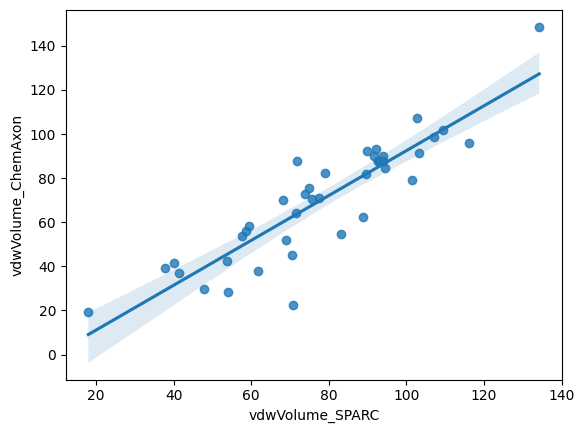

In [65]:
#SPARC vs. ChemAxon
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['vdwVolume_SPARC','vdwVolume_ChemAxon']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_ChemAxon'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_ChemAxon'])
print(r)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2661312922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8825455325648457, pvalue=5.106314978927078e-14)


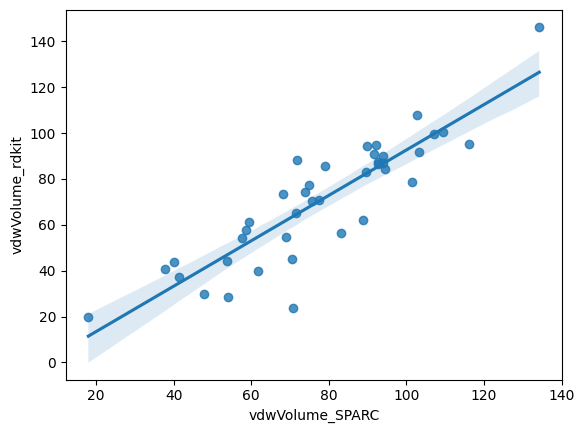

In [66]:
#SPARC vs RDKit
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['vdwVolume_SPARC','vdwVolume_rdkit']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_rdkit'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_rdkit'])
print(r)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\1542054378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8834187257619286, pvalue=4.466395620202939e-14)


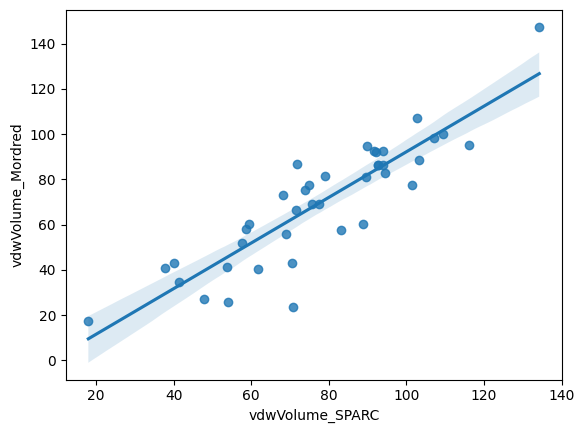

In [67]:
#SPARC vs Mordred
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['vdwVolume_SPARC','vdwVolume_Mordred']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_Mordred'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_Mordred'])
print(r)

### Compare obs. diffusivity to calc. diffusivity (cm2/sec)

In [68]:
complete_hayduk[['ObsD','diffCoe_SPARC','StokesEinstein_SPARC','StokesEinstein_ChemAxon','StokesEinstein_rdkit','StokesEinstein_Mordred']]

,ObsD,diffCoe_SPARC,StokesEinstein_SPARC,StokesEinstein_ChemAxon,StokesEinstein_rdkit,StokesEinstein_Mordred
0,0.000063,NaN,NaN,0.000003,0.000003,NaN
1,0.000023,NaN,NaN,0.000002,0.000002,NaN
2,0.000021,NaN,NaN,0.000002,0.000002,0.000002
3,0.000020,NaN,NaN,0.000003,0.000002,0.000002
4,0.000023,NaN,NaN,0.000003,0.000002,0.000003
5,0.000023,0.232467,0.000002,0.000003,0.000002,0.000003
6,0.000023,NaN,NaN,0.000002,0.000002,NaN
7,0.000019,NaN,NaN,0.000002,0.000002,0.000002
8,0.000016,NaN,NaN,0.000002,0.000002,0.000002
9,0.000021,0.178872,0.000002,0.000002,0.000002,0.000002


C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\4047234257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8893089610642857, pvalue=1.7587524124573912e-14)


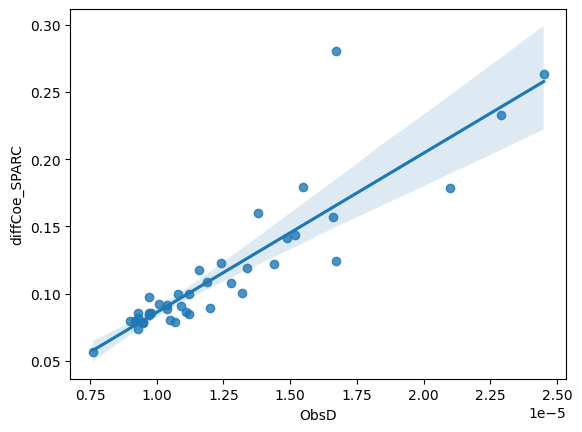

In [69]:
#Obs vs. SPARC calculate coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','diffCoe_SPARC']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['diffCoe_SPARC'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['diffCoe_SPARC'])
print(r)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3448326398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8011501725805632, pvalue=5.333771752815034e-10)
n= 40


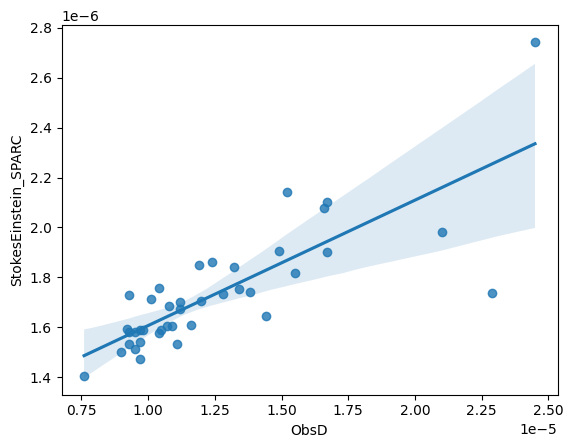

In [97]:
#Obs vs. SPARC Stokes-Einsteine coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','StokesEinstein_SPARC']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['StokesEinstein_SPARC'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['StokesEinstein_SPARC'])
print(r)
n=len(tmp['ObsD'])
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3803987631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8541909113815168, pvalue=3.0965377284124948e-15)
n= 50


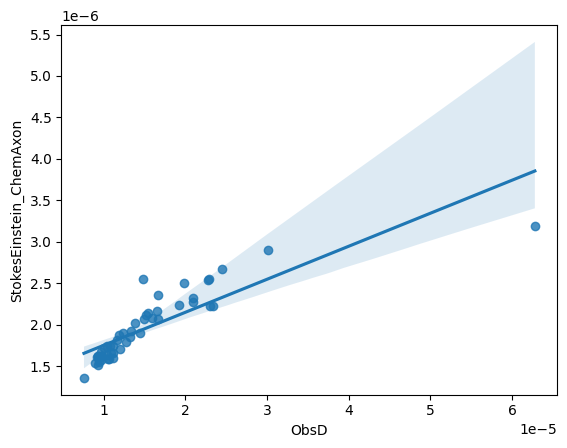

In [96]:
#Obs vs. ChemAxon Stokes-Einsteine coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','StokesEinstein_ChemAxon']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['StokesEinstein_ChemAxon'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['StokesEinstein_ChemAxon'])
print(r)
n=len(tmp['ObsD'])
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3509723133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8714931235188229, pvalue=8.89226874259247e-17)
n= 51


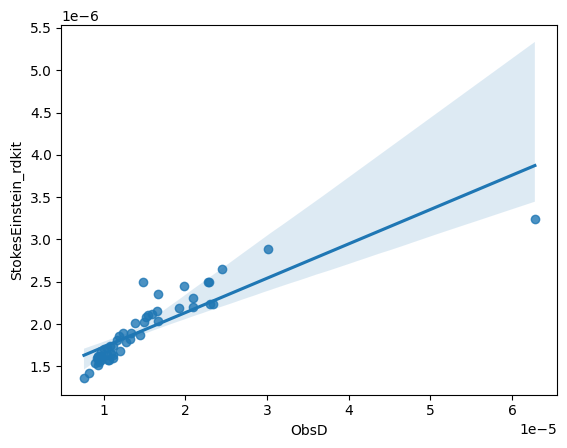

In [95]:
#Obs vs. rdkit Stokes-Einsteine coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','StokesEinstein_rdkit']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['StokesEinstein_rdkit'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['StokesEinstein_rdkit'])
print(r)
n=len(tmp['ObsD'])
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\811059276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9350044737348077, pvalue=1.9770791081635685e-21)
n= 46


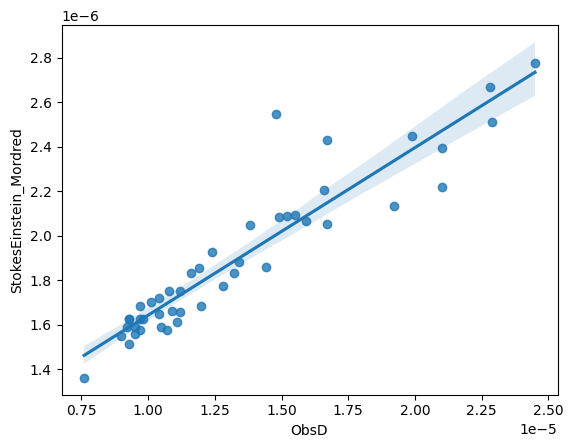

In [94]:
#Obs vs. Mordred Stokes-Einsteine coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','StokesEinstein_Mordred']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['StokesEinstein_Mordred'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['StokesEinstein_Mordred'])
print(r)
n=len(tmp['ObsD'])
print('n=',n)

## Air --Fuller

### Compare Van der Waal volume calcs

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\670873216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9406612525990534, pvalue=1.0523133169499274e-89)


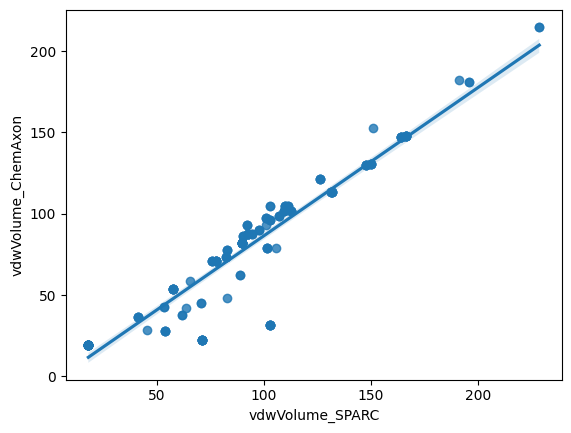

In [74]:
#SPARC vs. ChemAxon
#remove missing values so that I can calculate pearsons r
tmp=complete_fuller[['vdwVolume_SPARC','vdwVolume_ChemAxon']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_ChemAxon'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_ChemAxon'])
print(r)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3576365379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.941442055893786, pvalue=3.1641681260877445e-90)


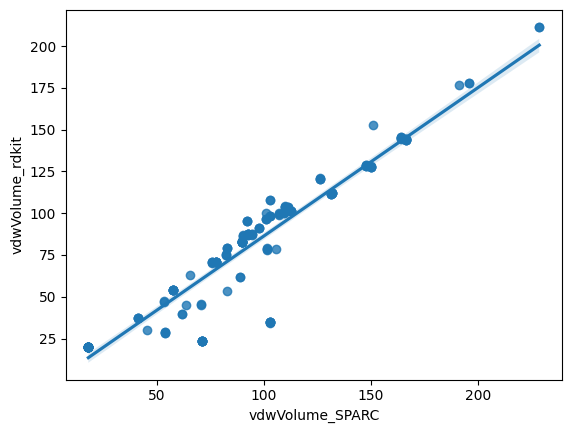

In [75]:
#SPARC vs RDKit
#remove missing values so that I can calculate pearsons r
tmp=complete_fuller[['vdwVolume_SPARC','vdwVolume_rdkit']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_rdkit'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_rdkit'])
print(r)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2503151078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9465680463793351, pvalue=7.67583519630076e-94)


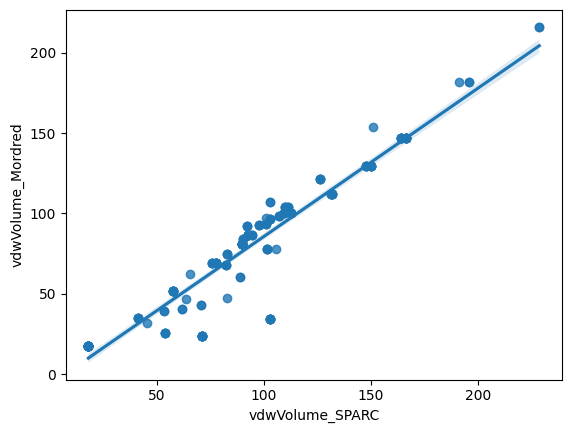

In [76]:
#SPARC vs Mordred
#remove missing values so that I can calculate pearsons r
tmp=complete_fuller[['vdwVolume_SPARC','vdwVolume_Mordred']]
tmp.dropna(how='any',inplace=True)

#plot regression
sns.regplot(x=tmp['vdwVolume_SPARC'],y=tmp['vdwVolume_Mordred'])

#calculate r2 and p value
r=stats.pearsonr(tmp['vdwVolume_SPARC'],tmp['vdwVolume_Mordred'])
print(r)

### Compare obs. diffusivity to calc. diffusivity (cm2/sec)

In [77]:
complete_fuller[['OBS_DiffusionCoefficient (cm^2/sec)','DiffCoe_SPARC','Fuller_ChemAxon','Fuller_rdkit','Fuller_Mordred']]

,OBS_DiffusionCoefficient (cm^2/sec),DiffCoe_SPARC,Fuller_ChemAxon,Fuller_rdkit,Fuller_Mordred
0,1.132,NaN,0.460901,0.468062,NaN
1,1.240,NaN,0.449943,0.449982,0.472266
2,1.250,NaN,0.470077,0.469679,0.493399
3,0.368,NaN,0.084875,0.082767,0.082852
4,0.401,NaN,0.090335,0.088053,0.088182
...,...,...,...,...,...
274,0.106,0.085039,0.107179,0.106761,0.106050
275,0.173,0.169358,0.146968,0.144162,0.141859
276,0.111,0.125886,0.107658,0.104773,0.103508
277,0.095,0.105948,0.089004,0.086579,0.086748


In [78]:
#extract values observed in AIR
sys_air=complete_fuller[complete_fuller['SYSTEM']=='AIR']
sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','DiffCoe_SPARC','Fuller_ChemAxon','Fuller_rdkit','Fuller_Mordred']]

,OBS_DiffusionCoefficient (cm^2/sec),DiffCoe_SPARC,Fuller_ChemAxon,Fuller_rdkit,Fuller_Mordred
233,0.1240,NaN,0.169855,0.166618,0.169855
234,0.0910,0.090906,0.103725,0.099831,0.104641
235,0.1420,NaN,0.127217,0.124203,0.120899
236,0.1650,NaN,0.141066,0.137396,0.134060
237,0.1772,NaN,0.162083,0.158086,0.154033
238,0.1220,NaN,0.121972,0.124621,0.121074
239,0.2600,0.263318,0.219323,0.217449,0.227938
240,0.2580,0.263318,0.220483,0.218541,0.229143
242,0.3050,0.263318,0.266336,0.263990,0.276798
243,0.2470,NaN,0.207769,0.204602,0.218976


C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2435588199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9275017590604534, pvalue=1.5876019744305438e-16)
n= 37


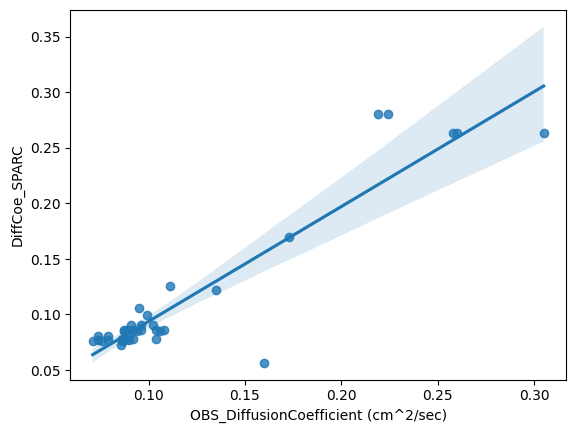

In [79]:
#Obs vs. SPARC
#remove missing values so that I can calculate pearsons r
tmp=sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','DiffCoe_SPARC']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['OBS_DiffusionCoefficient (cm^2/sec)'])

#plot regression
sns.regplot(x=tmp['OBS_DiffusionCoefficient (cm^2/sec)'],y=tmp['DiffCoe_SPARC'])

#calculate r2 and p value
r=stats.pearsonr(tmp['OBS_DiffusionCoefficient (cm^2/sec)'],tmp['DiffCoe_SPARC'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\4173487493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9578203990124415, pvalue=1.548059781725463e-20)
n= 37


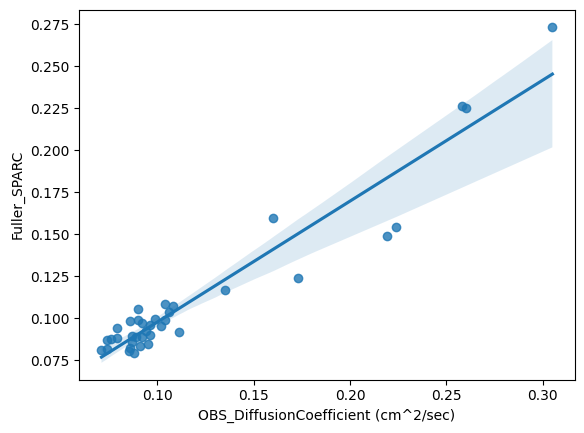

In [80]:
#Obs vs. ChemAxon
#remove missing values so that I can calculate pearsons r
tmp=sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','Fuller_SPARC']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['OBS_DiffusionCoefficient (cm^2/sec)'])

#plot regression
sns.regplot(x=tmp['OBS_DiffusionCoefficient (cm^2/sec)'],y=tmp['Fuller_SPARC'])

#calculate r2 and p value
r=stats.pearsonr(tmp['OBS_DiffusionCoefficient (cm^2/sec)'],tmp['Fuller_SPARC'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2091322883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.976287888582182, pvalue=7.155600133739135e-29)
n= 43


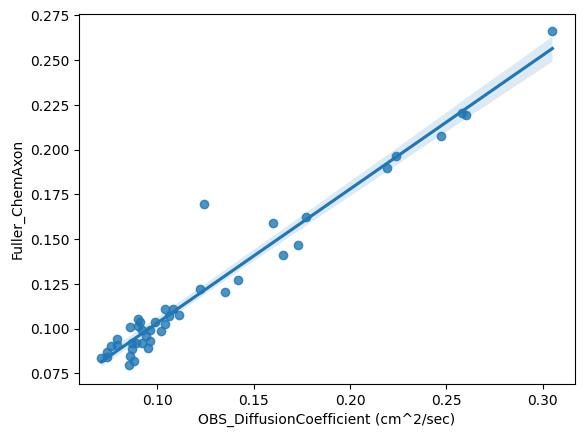

In [81]:
#Obs vs. ChemAxon
#remove missing values so that I can calculate pearsons r
tmp=sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','Fuller_ChemAxon']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['OBS_DiffusionCoefficient (cm^2/sec)'])

#plot regression
sns.regplot(x=tmp['OBS_DiffusionCoefficient (cm^2/sec)'],y=tmp['Fuller_ChemAxon'])

#calculate r2 and p value
r=stats.pearsonr(tmp['OBS_DiffusionCoefficient (cm^2/sec)'],tmp['Fuller_ChemAxon'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\1687931571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9754887857019348, pvalue=1.401112737418422e-28)
n= 43


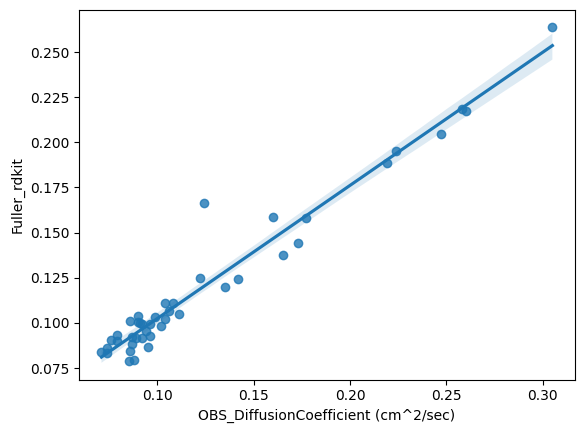

In [82]:
#Obs vs. RDKit
#remove missing values so that I can calculate pearsons r
tmp=sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','Fuller_rdkit']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['OBS_DiffusionCoefficient (cm^2/sec)'])
      
#plot regression
sns.regplot(x=tmp['OBS_DiffusionCoefficient (cm^2/sec)'],y=tmp['Fuller_rdkit'])

#calculate r2 and p value
r=stats.pearsonr(tmp['OBS_DiffusionCoefficient (cm^2/sec)'],tmp['Fuller_rdkit'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\4021224639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9739380125711264, pvalue=4.856396656111273e-28)
n= 43


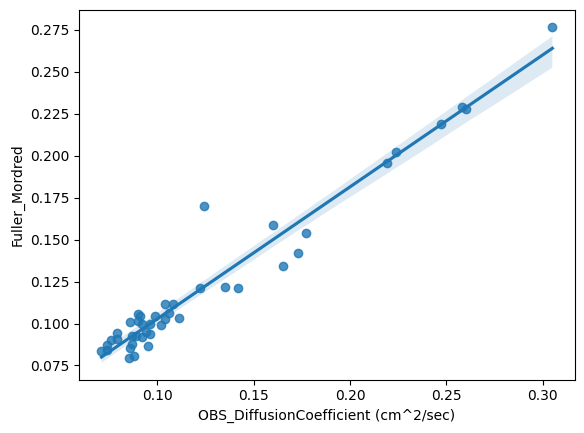

In [83]:
#Obs vs. Mordred
#remove missing values so that I can calculate pearsons r
tmp=sys_air[['OBS_DiffusionCoefficient (cm^2/sec)','Fuller_Mordred']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['OBS_DiffusionCoefficient (cm^2/sec)'])
#plot regression
sns.regplot(x=tmp['OBS_DiffusionCoefficient (cm^2/sec)'],y=tmp['Fuller_Mordred'])

#calculate r2 and p value
r=stats.pearsonr(tmp['OBS_DiffusionCoefficient (cm^2/sec)'],tmp['Fuller_Mordred'])
print(r)
print('n=',n)

# Wilke-Chang Method (water)

In [84]:
#constants
X=2.6 #constant that depends on solvent, this is the constant for water
n=0.00089 #viscosity of water 
T=298 #temp in K

wc=[]
for i in complete_hayduk.index:
    M=complete_hayduk['MolarMass_water'][i]
    V=complete_hayduk['vdwVolume_rdkit'][i]
    D=(7.4E-8)*((((X*M)**0.5)*T)/(n*((V)**0.6)))
    #D=7.4E-8*((X*M)**0.5*T)/(n*V**0.6)
    wc.append(D)
complete_hayduk['WilkeChang_rdkit']=wc

In [85]:
wc=[]
for i in complete_hayduk.index:
    M=complete_hayduk['MolarMass_water'][i]
    V=complete_hayduk['vdwVolume_Mordred'][i]
    D=(7.4E-8)*((((X*M)**0.5)*T)/(n*((V)**0.6)))
    #D=7.4E-8*((X*M)**0.5*T)/(n*V**0.6)
    wc.append(D)
complete_hayduk['WilkeChang_Mordred']=wc

In [86]:
wc=[]
for i in complete_hayduk.index:
    M=complete_hayduk['MolarMass_water'][i]
    V=complete_hayduk['vdwVolume_ChemAxon'][i]
    D=(7.4E-8)*((((X*M)**0.5)*T)/(n*((V)**0.6)))
    #D=7.4E-8*((X*M)**0.5*T)/(n*V**0.6)
    wc.append(D)
complete_hayduk['WilkeChang_ChemAxon']=wc

In [87]:
wc=[]
for i in complete_hayduk.index:
    M=complete_hayduk['MolarMass_water'][i]
    V=complete_hayduk['vdwVolume_SPARC'][i]
    D=(7.4E-8)*((((X*M)**0.5)*T)/(n*((V)**0.6)))
    #D=7.4E-8*((X*M)**0.5*T)/(n*V**0.6)
    wc.append(D)
complete_hayduk['WilkeChang_SPARC']=wc

In [88]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./DiffusivityCalculationResults.xlsx', engine='xlsxwriter')

complete_hayduk.to_excel(writer,sheet_name='Hayduk&Laudie1974_Water',index=False)
complete_fuller.to_excel(writer,sheet_name='Fuller_etal_1966_Air', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.close()

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3124461104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8473740740938782, pvalue=5.375605292221836e-12)
n= 40


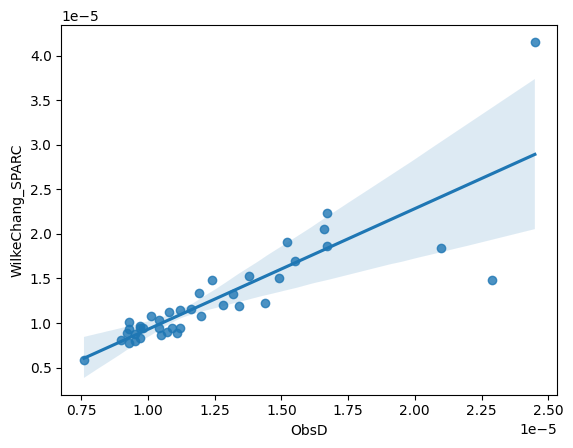

In [89]:
#Obs vs. SPARC Wilke-Chang coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','WilkeChang_SPARC']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['ObsD'])

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['WilkeChang_SPARC'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['WilkeChang_SPARC'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2588465835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9422846662839464, pvalue=1.880544741655535e-24)
n= 50


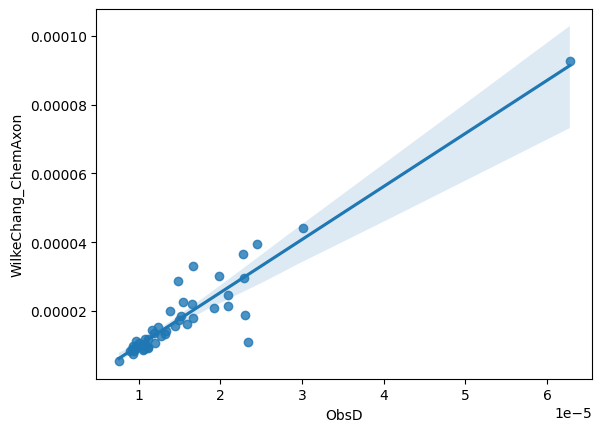

In [90]:
#Obs vs. ChemAxon Wilke-Chang coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','WilkeChang_ChemAxon']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['ObsD'])

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['WilkeChang_ChemAxon'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['WilkeChang_ChemAxon'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\2659911101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.9463394330403765, pvalue=1.0964801068879753e-25)
n= 51


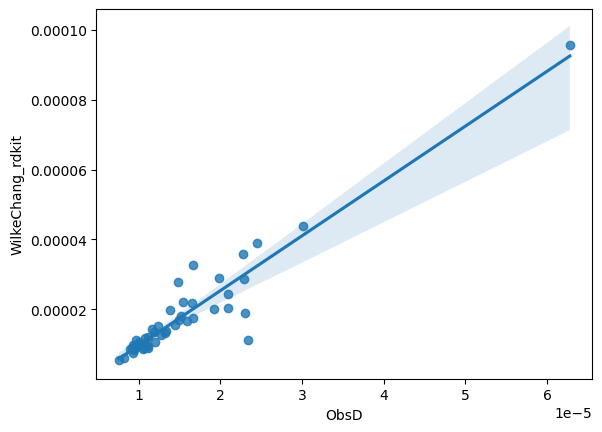

In [91]:
#Obs vs. ChemAxon Wilke-Chang coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','WilkeChang_rdkit']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['ObsD'])

#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['WilkeChang_rdkit'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['WilkeChang_rdkit'])
print(r)
print('n=',n)

C:\Users\LSHIELDS\AppData\Local\Temp\ipykernel_14484\3260381638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(how='any',inplace=True)


PearsonRResult(statistic=0.8976200056685609, pvalue=2.935896659330382e-17)
n= 46


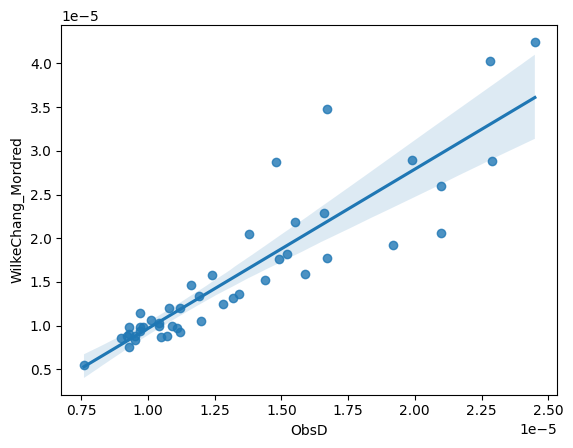

In [93]:
#Obs vs. ChemAxon Stokes-Einsteine coefficient
#remove missing values so that I can calculate pearsons r
tmp=complete_hayduk[['ObsD','WilkeChang_Mordred']]
tmp.dropna(how='any',inplace=True)
n=len(tmp['ObsD'])
#plot regression
sns.regplot(x=tmp['ObsD'],y=tmp['WilkeChang_Mordred'])

#calculate r2 and p value
r=stats.pearsonr(tmp['ObsD'],tmp['WilkeChang_Mordred'])
print(r)
print('n=',n)